In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np

Use google derive to fetching the CSV file 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline

**%matplotlib inline Provides support for matplotlib to display figures directly inline in the notebook**

In [ ]:
# import os
# os.chdir("/content/gdrive/My Drive/MachineLearningProjects/FlightPrice")

In [ ]:
path = "/content/gdrive/My Drive/MachineLearningProjects/FlightPrice/FlightPricePrediction.csv"
dataFrame = pd.read_csv(path)

In [ ]:
dataFrame

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0
...,...,...,...,...,...,...,...,...,...
13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435,NaN
13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155,NaN
13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395,NaN
13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915,NaN


In [ ]:
dataFrame.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0


In [ ]:
dataFrame.isna().sum()


Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Total_Stops              1
total_duration_min       0
Price                 2670
dtype: int64

# Split dataset into train and test 

Main train dataset store price is not null

In [ ]:
mainTrain = dataFrame[dataFrame.Price.isnull()==False]

In [ ]:
mainTrain

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0
...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU → BLR,19:55,non-stop,150,4107.0
10678,Air India,27-04-2019,Kolkata,Banglore,CCU → BLR,20:45,non-stop,155,4145.0
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR → DEL,08:20,non-stop,180,7229.0
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR → DEL,11:30,non-stop,160,12648.0


In [ ]:
mainTrain.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Total_Stops           1
total_duration_min    0
Price                 0
dtype: int64

In [ ]:
mainTrain.shape

(10682, 9)

main test store price column is null

In [ ]:

mainTest = dataFrame[dataFrame.Price.isnull()]


In [ ]:
mainTest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655,NaN
10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240,NaN
10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425,NaN
10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780,NaN
10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170,NaN
...,...,...,...,...,...,...,...,...,...
13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435,NaN
13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155,NaN
13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395,NaN
13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915,NaN


In [ ]:
mainTest.isna().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Total_Stops              0
total_duration_min       0
Price                 2670
dtype: int64

In [ ]:
mainTest.shape

(2670, 9)

PreProcessing for mainTrain Dataset

In [19]:
mainTrain[mainTrain.Route.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,NaN,1420,7480.0


Remove Null Value 

In [20]:
mainTrain=mainTrain[mainTrain.Route.isnull()==False]

In [22]:
mainTrain.shape

(10681, 9)

In [23]:
mainTrain.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24-03-2019  Banglore   New Delhi   
1        Air India      01-05-2019   Kolkata    Banglore   
2      Jet Airways      09-06-2019     Delhi      Cochin   
3           IndiGo      12-05-2019   Kolkata    Banglore   
4           IndiGo      01-03-2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10677     Air Asia      09-04-2019   Kolkata    Banglore   
10678    Air India      27-04-2019   Kolkata    Banglore   
10679  Jet Airways      27-04-2019  Banglore       Delhi   
10680      Vistara      01-03-2019  Banglore   New Delhi   
10681    Air India      09-05-2019     Delhi      Cochin   

                       Route Dep_Time Total_Stops  total_duration_min    Price  
0                  BLR → DEL    22:20    non-stop                 170   3897.0  
1      CCU → IXR → BBI → BLR    05:50     2 stops                 445   7662.0  
2   

In [25]:
mainTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10681
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Airline             10681 non-null  object 
 1   Date_of_Journey     10681 non-null  object 
 2   Source              10681 non-null  object 
 3   Destination         10681 non-null  object 
 4   Route               10681 non-null  object 
 5   Dep_Time            10681 non-null  object 
 6   Total_Stops         10681 non-null  object 
 7   total_duration_min  10681 non-null  int64  
 8   Price               10681 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 834.5+ KB


In [26]:
#Date Time Conversion

mainTrain['Date_of_Journey'] = pd.to_datetime(mainTrain['Date_of_Journey'])


In [28]:
mainTrain.cov()

,total_duration_min,Price
total_duration_min,2.578775e+05,1.186720e+06
Price,1.186720e+06,2.126202e+07


In [29]:
mainTrain.nunique()

Airline                 12
Date_of_Journey         40
Source                   5
Destination              6
Route                  128
Dep_Time               222
Total_Stops              5
total_duration_min     367
Price                 1870
dtype: int64

DataSet Clubing

In [30]:
mainTrain['Airline'] = np.where(mainTrain['Airline'].isin(["Multiple carriers Premium economy",
                                                             "Jet Airways Business",
                                                             "Vistara Premium economy",
                                                             "Trujet"]),"Other Airlines",mainTrain['Airline'])

Sorting basis of date of Journey

In [32]:
mainTrain.sort_values(by=['Date_of_Journey']).head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
3835,SpiceJet,2019-01-03,Kolkata,Banglore,CCU → BLR,09:00,non-stop,150,5515.0
7355,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,00:20,1 stop,780,29528.0
486,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,1 stop,380,26890.0
3545,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,2 stops,1580,19372.0
3543,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,10:05,non-stop,175,10067.0


Split train data into x and y  
   x: contain value without price column
   y: contain only price column


In [33]:
X = mainTrain.drop('Price',axis=1)


In [34]:
y=mainTrain['Price']

In [36]:
X

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285
...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,non-stop,150
10678,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,non-stop,155
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,non-stop,180
10680,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,non-stop,160


In [37]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10677     4107.0
10678     4145.0
10679     7229.0
10680    12648.0
10681    11753.0
Name: Price, Length: 10681, dtype: float64

Spliting data int 70:30

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)


In [39]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)


In [40]:
X_train.shape

(7476, 8)

In [41]:
X_val.shape 

(1602, 8)

In [42]:
X_test.shape

(1603, 8)

## EDA

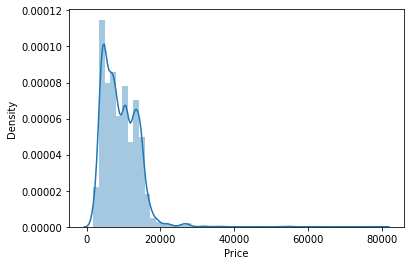

In [43]:
sns.distplot(y_train)

In [44]:
X_train.merge(y_train,on = X_train.index)

,key_0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
0,0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3897.0
1,1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,7662.0
2,2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,13882.0
3,3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,6218.0
4,4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,13302.0
...,...,...,...,...,...,...,...,...,...,...
7471,7471,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,10:00,1 stop,555,16439.0
7472,7472,Jet Airways,2019-05-21,Kolkata,Banglore,CCU → BOM → BLR,14:05,1 stop,510,14781.0
7473,7473,Jet Airways,2019-03-06,Delhi,Cochin,DEL → BOM → COK,19:45,1 stop,1010,10262.0
7474,7474,Jet Airways,2019-05-24,Kolkata,Banglore,CCU → BOM → BLR,14:05,1 stop,1690,10844.0


Scatter plot

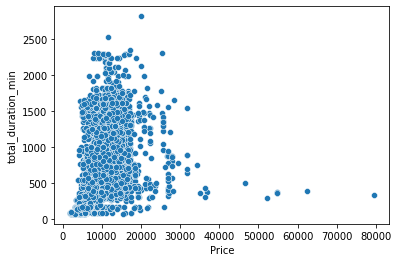

In [45]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Price", y="total_duration_min")

In [46]:
X_train.Route.nunique()

122

Minimum and maximum rate flights  and provides the service to the most of the routes

In [48]:
X_train.merge(y_train,on = X_train.index).groupby(['Route','Airline'])['Price'].agg(['min']).unstack().T.idxmin()

Route
BLR → AMD → DEL                    (min, Vistara)
BLR → BBI → DEL                  (min, Air India)
BLR → BDQ → DEL                (min, Jet Airways)
BLR → BOM → AMD → DEL            (min, Air India)
BLR → BOM → BHO → DEL            (min, Air India)
                                      ...        
DEL → PNQ → COK                   (min, SpiceJet)
DEL → RPR → NAG → BOM → COK      (min, Air India)
DEL → TRV → COK                     (min, IndiGo)
DEL → UDR → BOM → COK            (min, Air India)
MAA → CCU                        (min, Air India)
Length: 122, dtype: object

In [49]:
X_train.merge(y_train , on = X_train.index).groupby(['Total_Stops','Airline'])['Price'].agg(['min']).unstack().T.idxmin()


Total_Stops
1 stop         (min, IndiGo)
2 stops     (min, Air India)
3 stops     (min, Air India)
non-stop     (min, SpiceJet)
dtype: object

Feature Engineering

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7475
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Airline             7476 non-null   object        
 1   Date_of_Journey     7476 non-null   datetime64[ns]
 2   Source              7476 non-null   object        
 3   Destination         7476 non-null   object        
 4   Route               7476 non-null   object        
 5   Dep_Time            7476 non-null   object        
 6   Total_Stops         7476 non-null   object        
 7   total_duration_min  7476 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 525.7+ KB


In [51]:
from sklearn.preprocessing import LabelEncoder
Airline_encoder = LabelEncoder()
Airline_encoder.fit(X_train['Airline'])
X_train['Airline_enc'] = Airline_encoder.transform(X_train['Airline'])

In [52]:
X_train[['Airline_enc','Airline']]

,Airline_enc,Airline
0,3,IndiGo
1,1,Air India
2,4,Jet Airways
3,3,IndiGo
4,3,IndiGo
...,...,...
7471,1,Air India
7472,4,Jet Airways
7473,4,Jet Airways
7474,4,Jet Airways


In [53]:
X_val['Airline_enc'] = Airline_encoder.transform(X_val['Airline'])
X_test['Airline_enc'] = Airline_encoder.transform(X_test['Airline'])

In [54]:
X_test[['Airline_enc','Airline']]

,Airline_enc,Airline
9079,8,Vistara
9080,7,SpiceJet
9081,5,Multiple carriers
9082,4,Jet Airways
9083,7,SpiceJet
...,...,...
10677,0,Air Asia
10678,1,Air India
10679,4,Jet Airways
10680,8,Vistara


In [55]:
X_train.drop(['Airline'], axis =1,inplace=True)
X_val.drop(['Airline'],axis=1 , inplace=True)
X_test.drop(['Airline'],axis=1 , inplace=True)

In [56]:
X_train

,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Airline_enc
0,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,non-stop,170,3
1,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2 stops,445,1
2,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2 stops,1140,4
3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,1 stop,325,3
4,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,1 stop,285,3
...,...,...,...,...,...,...,...,...
7471,2019-06-03,Delhi,Cochin,DEL → BOM → COK,10:00,1 stop,555,1
7472,2019-05-21,Kolkata,Banglore,CCU → BOM → BLR,14:05,1 stop,510,4
7473,2019-03-06,Delhi,Cochin,DEL → BOM → COK,19:45,1 stop,1010,4
7474,2019-05-24,Kolkata,Banglore,CCU → BOM → BLR,14:05,1 stop,1690,4


In [57]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7475
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date_of_Journey     7476 non-null   datetime64[ns]
 1   Source              7476 non-null   object        
 2   Destination         7476 non-null   object        
 3   Route               7476 non-null   object        
 4   Dep_Time            7476 non-null   object        
 5   Total_Stops         7476 non-null   object        
 6   total_duration_min  7476 non-null   int64         
 7   Airline_enc         7476 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 525.7+ KB


In [58]:
def Col_Remover(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)
    return traindf,valdf ,testdf

In [59]:
X_train['day_of_week'] = X_train['Date_of_Journey'].dt.weekday 
X_val['day_of_week'] = X_val['Date_of_Journey'].dt.weekday 
X_test['day_of_week'] = X_test['Date_of_Journey'].dt.weekday     

In [60]:
X_train['day_of_Journey'] = X_train['Date_of_Journey'].dt.day
X_train['month_of_Journey'] = X_train['Date_of_Journey'].dt.month
X_train['year_of_Journey'] = X_train['Date_of_Journey'].dt.year

X_val['day_of_Journey'] = X_val['Date_of_Journey'].dt.day
X_val['month_of_Journey'] = X_val['Date_of_Journey'].dt.month
X_val['year_of_Journey'] = X_val['Date_of_Journey'].dt.year


X_test['day_of_Journey'] = X_test['Date_of_Journey'].dt.day
X_test['month_of_Journey'] = X_test['Date_of_Journey'].dt.month
X_test['year_of_Journey'] = X_test['Date_of_Journey'].dt.year


In [61]:
X_train ,X_val, X_test = Col_Remover(['Date_of_Journey'])


Label Encoding

In [62]:
src_Enc = LabelEncoder()
des_enc = LabelEncoder()

src_Enc.fit(X_train['Source'])
des_enc.fit(X_train['Destination'])

X_train['Source_enc'] = src_Enc.transform(X_train['Source'])
X_train['Destination_enc'] = des_enc.transform(X_train['Destination'])

X_val['Source_enc'] = src_Enc.transform(X_val['Source'])
X_val['Destination_enc'] = des_enc.transform(X_val['Destination'])

X_test['Source_enc'] = src_Enc.transform(X_test['Source'])
X_test['Destination_enc'] = des_enc.transform(X_test['Destination'])


In [63]:
X_train ,X_val, X_test = Col_Remover(['Source','Destination'])

In [64]:
route_encoder = LabelEncoder()

route_encoder.fit(X_train['Route'])

X_train['Route_enc'] = route_encoder.transform(X_train['Route'])

In [65]:
diff = set(X_val['Route'])-set(route_encoder.classes_)
for items in diff:
    route_encoder.classes_ = np.append(route_encoder.classes_,items)

In [66]:
X_val['Route_enc'] = route_encoder.transform(X_val['Route'])

In [67]:
diff2 = set(X_test['Route'])-set(route_encoder.classes_)
for items in diff2:
    route_encoder.classes_ = np.append(route_encoder.classes_,items)


In [68]:
X_test['Route_enc'] = route_encoder.transform(X_test['Route'])

In [69]:
X_train ,X_val, X_test = Col_Remover(['Route'])


In [70]:
X_train['Dep_Time'] = X_train['Dep_Time'].str.replace(':',"").astype(int)
X_val['Dep_Time'] = X_val['Dep_Time'].str.replace(':',"").astype(int)
X_test['Dep_Time'] = X_test['Dep_Time'].str.replace(':',"").astype(int)

In [72]:
def status_check(traindf = X_train,valdf = X_val,testdf = X_test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())    


In [73]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7475
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dep_Time            7476 non-null   int64 
 1   Total_Stops         7476 non-null   object
 2   total_duration_min  7476 non-null   int64 
 3   Airline_enc         7476 non-null   int64 
 4   day_of_week         7476 non-null   int64 
 5   day_of_Journey      7476 non-null   int64 
 6   month_of_Journey    7476 non-null   int64 
 7   year_of_Journey     7476 non-null   int64 
 8   Source_enc          7476 non-null   int64 
 9   Destination_enc     7476 non-null   int64 
 10  Route_enc           7476 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 700.9+ KB
None
****************************
(7476, 11) (1602, 11) (1603, 11)
************Train Null Count****************
Dep_Time              0
Total_Stops           0
total_duration_min    0
Airline_enc           0
day_of_w

In [74]:
X_train["Total_Stops"] = X_train["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
X_val["Total_Stops"] = X_val["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)
X_test["Total_Stops"] = X_test["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)


Feature Selection

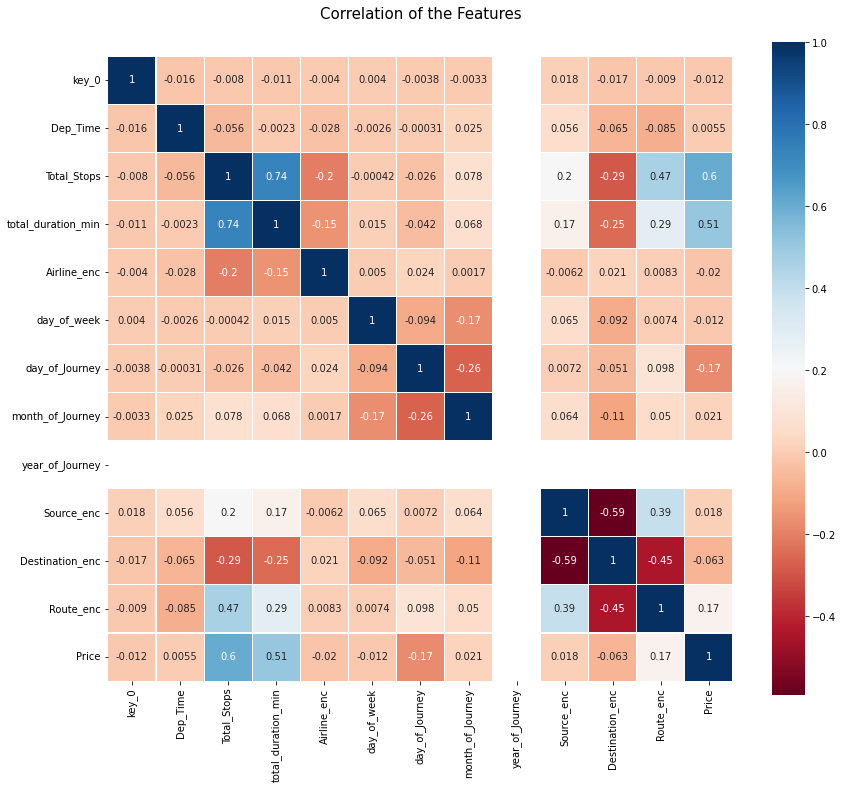

In [75]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Correlation of the Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)


In [76]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [77]:
sel.variances_


array([3.32452330e+05, 4.48921246e-01, 2.52301334e+05, 3.62683031e+00,
       3.39075516e+00, 7.73599744e+01, 8.88596122e+00, 0.00000000e+00,
       1.38977412e+00, 2.14058318e+00, 1.23641287e+03])

In [78]:
X_train,X_val ,X_test = Col_Remover(['year_of_Journey'])

In [79]:
status_check()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7476 entries, 0 to 7475
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Dep_Time            7476 non-null   int64
 1   Total_Stops         7476 non-null   int64
 2   total_duration_min  7476 non-null   int64
 3   Airline_enc         7476 non-null   int64
 4   day_of_week         7476 non-null   int64
 5   day_of_Journey      7476 non-null   int64
 6   month_of_Journey    7476 non-null   int64
 7   Source_enc          7476 non-null   int64
 8   Destination_enc     7476 non-null   int64
 9   Route_enc           7476 non-null   int64
dtypes: int64(10)
memory usage: 642.5 KB
None
****************************
(7476, 10) (1602, 10) (1603, 10)
************Train Null Count****************
Dep_Time              0
Total_Stops           0
total_duration_min    0
Airline_enc           0
day_of_week           0
day_of_Journey        0
month_of_Journey      0
Source_e

Modelling

In [80]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_predict = base_model.predict(X_val)

In [82]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

3309.8956141041604

In [83]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [84]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

0.6228731963181625

Tree base Model

In [85]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=5)

In [86]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [87]:
y_predict2 = regressor.predict(X_val)

In [88]:
mean_squared_error(y_val, y_predict2, squared=False)

2343.0470814980317

In [89]:
y_predict_test = regressor.predict(X_test)
mean_squared_error(y_test, y_predict_test, squared=False)

3119.3308453049367

Now to time start work Maintest

In [90]:
mainTest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655,NaN
10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240,NaN
10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425,NaN
10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780,NaN
10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170,NaN
...,...,...,...,...,...,...,...,...,...
13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435,NaN
13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155,NaN
13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395,NaN
13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915,NaN


In [91]:
mainTest.isna().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Total_Stops              0
total_duration_min       0
Price                 2670
dtype: int64

In [92]:
X_main_test = mainTest.drop(['Price'],axis=1)
X_main_test

# ALSO LETS DROP PRICE FROM MAIN TEST ITSELF
mainTest.drop(['Price'], inplace =True,axis=1)

In [93]:
X_main_test['Date_of_Journey'] = pd.to_datetime(X_main_test['Date_of_Journey'])

In [94]:
temp = set(X_main_test['Airline'])-set(Airline_encoder.classes_)
for items in temp:
    Airline_encoder.classes_= np.append(Airline_encoder.classes_,items)
X_main_test['Airline_enc'] = Airline_encoder.transform(X_main_test['Airline'])

In [95]:
X_main_test['day_of_week'] = X_main_test['Date_of_Journey'].dt.weekday 
X_main_test['day_of_Journey'] = X_main_test['Date_of_Journey'].dt.day
X_main_test['month_of_Journey'] = X_main_test['Date_of_Journey'].dt.month
X_main_test['year_of_Journey'] = X_main_test['Date_of_Journey'].dt.year

In [98]:
X_main_test['Source_enc'] = src_Enc.transform(X_main_test['Source'])
X_main_test['Destination_enc'] = des_enc.transform(X_main_test['Destination'])

In [99]:
temp2 = set(X_main_test['Route'])-set(route_encoder.classes_)
for items in temp2:
    route_encoder.classes_= np.append(route_encoder.classes_,items)
    
X_main_test['Route_enc'] = route_encoder.transform(X_main_test['Route'])

In [100]:
X_main_test['Dep_Time'] = X_main_test['Dep_Time'].str.replace(':',"").astype(int)

In [101]:
X_main_test["Total_Stops"] = X_main_test["Total_Stops"].str.replace("non-","0 ").str.split(" ").str[0].astype(int)

In [102]:
X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 10682 to 13351
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Airline             2670 non-null   object        
 1   Date_of_Journey     2670 non-null   datetime64[ns]
 2   Source              2670 non-null   object        
 3   Destination         2670 non-null   object        
 4   Route               2670 non-null   object        
 5   Dep_Time            2670 non-null   int64         
 6   Total_Stops         2670 non-null   int64         
 7   total_duration_min  2670 non-null   int64         
 8   Airline_enc         2670 non-null   int64         
 9   day_of_week         2670 non-null   int64         
 10  day_of_Journey      2670 non-null   int64         
 11  month_of_Journey    2670 non-null   int64         
 12  year_of_Journey     2670 non-null   int64         
 13  Source_enc          2670 non-null   int64  

In [103]:
X_main_test.drop(['Airline','Date_of_Journey','Source','Destination','Route'],inplace =True ,axis=1)

In [104]:
X_main_test.columns

Index(['Dep_Time', 'Total_Stops', 'total_duration_min', 'Airline_enc',
       'day_of_week', 'day_of_Journey', 'month_of_Journey', 'year_of_Journey',
       'Source_enc', 'Destination_enc', 'Route_enc'],
      dtype='object')

In [105]:
X_train.columns

Index(['Dep_Time', 'Total_Stops', 'total_duration_min', 'Airline_enc',
       'day_of_week', 'day_of_Journey', 'month_of_Journey', 'Source_enc',
       'Destination_enc', 'Route_enc'],
      dtype='object')

In [106]:
X_main_test.drop(['year_of_Journey'],inplace =True ,axis=1)

Price Prediction

In [108]:
predictedResult = regressor.predict(X_main_test)

In [109]:
predictedResult = pd.Series(predictedResult,name='Price')

In [110]:
mainTest.reset_index(drop=True,inplace=True)


In [111]:
Result = mainTest.merge(predictedResult , on = X_main_test.index )


In [112]:
Result

,key_0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
0,10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655,12463.063173
1,10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240,5913.272512
2,10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425,12463.063173
3,10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780,9851.501722
4,10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170,4681.839544
...,...,...,...,...,...,...,...,...,...,...
2665,13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435,7867.000000
2666,13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155,4681.839544
2667,13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395,15876.991968
2668,13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915,12843.463687


In [113]:
mainTest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min
0,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655
1,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240
2,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425
3,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780
4,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170
...,...,...,...,...,...,...,...,...
2665,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435
2666,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155
2667,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395
2668,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915


In [114]:
mainTest = Result

In [115]:
mainTest

,key_0,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,total_duration_min,Price
0,10682,Jet Airways,06-06-2019,Delhi,Cochin,DEL → BOM → COK,17:30,1 stop,655,12463.063173
1,10683,IndiGo,12-05-2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,1 stop,240,5913.272512
2,10684,Jet Airways,21-05-2019,Delhi,Cochin,DEL → BOM → COK,19:15,1 stop,1425,12463.063173
3,10685,Multiple carriers,21-05-2019,Delhi,Cochin,DEL → BOM → COK,08:00,1 stop,780,9851.501722
4,10686,Air Asia,24-06-2019,Banglore,Delhi,BLR → DEL,23:55,non-stop,170,4681.839544
...,...,...,...,...,...,...,...,...,...,...
2665,13347,Air India,06-06-2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,1 stop,1435,7867.000000
2666,13348,IndiGo,27-03-2019,Kolkata,Banglore,CCU → BLR,14:20,non-stop,155,4681.839544
2667,13349,Jet Airways,06-03-2019,Delhi,Cochin,DEL → BOM → COK,21:50,1 stop,395,15876.991968
2668,13350,Air India,06-03-2019,Delhi,Cochin,DEL → BOM → COK,04:00,1 stop,915,12843.463687


In [116]:
mainTest.isna().sum()

key_0                 0
Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 0
Dep_Time              0
Total_Stops           0
total_duration_min    0
Price                 0
dtype: int64

In [117]:
mainTest.shape

(2670, 10)